<a href="https://colab.research.google.com/github/OseiasBeu/Data-Science/blob/master/AnalisePokerHand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando Mãos de Poker**
![alt text](https://img.over-blog-kiwi.com/3/25/18/80/20190718/ob_1064c9_texas-web-banner.png)

---------------------------------------------------------------------------------------
### Informações do conjunto de dados:
---------------------------------------------------------------------------------------

Cada registro é um exemplo de uma mão composta por cinco cartas de baralho retiradas de um baralho padrão de 52. Cada carta é descrita usando dois atributos (naipe e patente), para um total de 10 atributos preditivos(***mãos do poker***). Há um atributo de classe que descreve a "mão de pôquer". A ordem das cartas é importante, e é por isso que existem 480 mãos Royal Flush possíveis em comparação com 4.

---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
### Informações sobre atributos:
---------------------------------------------------------------------------------------

|   ID   |      Descrição do ID      |                       Descrição da Posição                      |
|:------:|:-------------------------:|:---------------------------------------------------------------:|
| S1     | "Naipe da carta nº 1"     | Ordinal (1-4) representando {Copas, espadas, diamantes, clubes} |
| C1     | "Posição da carta nº 1"   | Numérica (1-13) representando (Ás, 2, 3, ..., Rainha, Rei)      |
| S2     | "Naipe da carta nº 2"     | Ordinal (1-4) representando {Copas, espadas, diamantes, clubes} |
| C2     | "Posição da carta nº 2"   | Numérica (1-13) representando (Ás, 2, 3, ..., rainha, rei)      |
| S3     | "Naipe da carta nº 3"     | Ordinal (1-4) representando {Copas, espadas, diamantes, clubes} |
| C3     | "Posição da carta nº 3"   | Numérico (1-13) representando (Ás, 2, 3, ..., Rainha, Rei)      |
| S4     | "Naipe da carta nº 4"     | Ordinal (1-4) representando {Copas, Espadas, Diamantes, Clubes} |
| C4     | "Posição do cartão nº 4"  | Numérico (1-13) representando (Ás, 2, 3, ..., Rainha, Rei)      |
| S5     | "Naipe da carta nº 5"     | Ordinal (1-4) representando {Copas, Espadas, Diamantes, Paus}   |
| C5     | "Posição da carta nº 5"   | Numérica (1-13) representando (Ás, 2, 3, ..., Rainha, Rei)      |
| CLASSE | CLASSE "Mão de Pôquer"    | Ordinal (0-9)                                                   |
|        |                           |                                                                 |


---------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
### Classes de mãos no poker:
---------------------------------------------------------------------------------------

O que é uma ***mão de pôquer***? No pôquer, os jogadores estruturam conjuntos de cinco cartas, chamadas mãos, de acordo com os princípios do jogo. Cada mão tem uma posição, que é vista contra as posições de mãos diferentes, interessando-se pelo impasse para escolher quem ganha o pote.

---------------------------------------------------------------------------------------
### Descrição das classes de mãos:
---------------------------------------------------------------------------------------



| ID da Mão |   Nome da Mão   |                     Descrição da mão                    |   |   |
|:---------:|:---------------:|:-------------------------------------------------------:|---|---|
| 0         | Nothing in hand | Não é uma mão de pôquer reconhecida                     |   |   |
| 1         | One pair        | Um par de classificações iguais em cinco cartas         |   |   |
| 2         | Two pairs       | Dois pares de classificações iguais em cinco cartas     |   |   |
| 3         | Three of a kind | Três filas iguais em cinco cartas                       |   |   |
| 4         | Straight        | Cinco cartas, seqüencialmente classificadas sem lacunas |   |   |
| 5         | Flush           | Cinco cartas do mesmo naipe                             |   |   |
| 6         | Full house      | Par + classificação diferente três do mesmo tipo        |   |   |
| 7         | Four of a kind  | Quatro posições iguais em cinco cartas                  |   |   |
| 8         | Straight flush  | Straight + flush                                        |   |   |
| 9         | Royal flush     | {Ás, Rei, Dama, Valete, Dez} + flush                    |   |   |
|           |                 |                                                         |   |   |


---------------------------------------------------------------------------------------

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [9]:
data_train=pd.read_csv('/content/poker-hand-training-true.data',header=None)
data_test = pd.read_csv('/content/poker-hand-testing.data',header=None)
# data_class = pd.read_csv('/home/oseiasbeu/Documents/MBA_PYTHON/TrabalhoFinal/Poker/tabelaDeClassificacao.csv',delimiter=';')
col=['Suit of card #1','Rank of card #1','Suit of card #2','Rank of card #2','Suit of card #3','Rank of card #3','Suit of card #4','Rank of card #4','Suit of card #5','Rank of card 5','Poker Hand']
data_train.columns=col
data_test.columns=col
data_test.head()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


#### Verificando quantas linhas e colunas nosso dataset possui:

In [10]:
data_test.shape

(1000000, 11)

#### Extraindo informações sobre o dataset

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype
---  ------           --------------    -----
 0   Suit of card #1  1000000 non-null  int64
 1   Rank of card #1  1000000 non-null  int64
 2   Suit of card #2  1000000 non-null  int64
 3   Rank of card #2  1000000 non-null  int64
 4   Suit of card #3  1000000 non-null  int64
 5   Rank of card #3  1000000 non-null  int64
 6   Suit of card #4  1000000 non-null  int64
 7   Rank of card #4  1000000 non-null  int64
 8   Suit of card #5  1000000 non-null  int64
 9   Rank of card 5   1000000 non-null  int64
 10  Poker Hand       1000000 non-null  int64
dtypes: int64(11)
memory usage: 83.9 MB


#### Informções extraídas: 
- Temos 1 milhão de linhas;
- 11 colunas;
- Nenhum valor nulo;
- Temos apenas um tipo de dado;

#### Estatística Descritiva:

In [12]:
data_test.describe()

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card 5,Poker Hand
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500493,6.997927,2.499894,7.006097,2.500871,6.998873,2.500393,7.002298,2.499451,6.989481,0.616902
std,1.117768,3.743374,1.118568,3.743481,1.118225,3.741890,1.117245,3.741270,1.118948,3.739894,0.773377
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,3.000000,7.000000,2.000000,7.000000,0.000000
75%,3.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,4.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


##### Média de mãos:

In [13]:
data_test['Poker Hand'].mean()

0.616902

##### Mediana de Mãos: 

In [14]:
data_test['Poker Hand'].median() 

0.0

##### Moda:

In [15]:
data_test['Poker Hand'].mode() 

0    0
dtype: int64

O a mediada e a moda da classificação de jogadas é zero, significa que em ***1 milhão de rodadas*** a mão que mais sai é a mais fraca (0 = Nada na mão)

##### Variância e desvio Padrão:

In [16]:
print(data_test['Poker Hand'].var())
print(data_test['Poker Hand'].std())

0.598112520505389
0.7733773467754205


O desvio padrão ***não*** está longe de zero, o que significa que em ***1 milhão de rodadas*** as chances de tirar uma mão maior são pequenas.

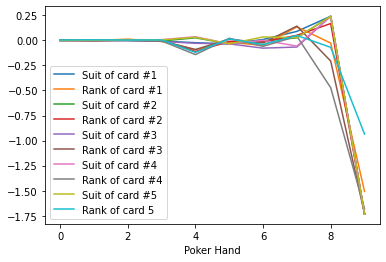

In [45]:
# data_test['Poker Hand'].groupby()skew().plot(kind="bar")
data_test.groupby(['Poker Hand']).skew().plot()

Com valores acima de zero podemos dizer que existe uma assimetria positiva.

#### Verificando a Tabela de classificação:

##### Contando quantas mãos temos de menor classificação:

In [18]:
data_test['Poker Hand'][data_test['Poker Hand'] == 1].count()

422498

In [19]:
data_test['Poker Hand'][data_test['Poker Hand'] == 0].count()

501209

#### Agrupando todas as mãos do dataSet:

In [20]:
groupHand = data_test.groupby(['Poker Hand'])['Poker Hand'].count() 
groupHand

Poker Hand
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: Poker Hand, dtype: int64

Dessa forma vemos que as chances de sair com a mão mais forte são de 3 em ***1 Milhão***.

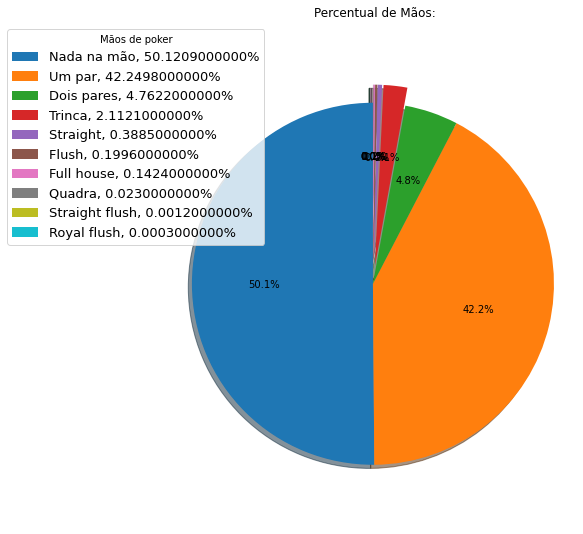

In [21]:
labels = ['Nada na mão','Um par','Dois pares','Trinca','Straight','Flush','Full house','Quadra','Straight flush','Royal flush']
fig1, ax1 = plt.subplots(figsize=(8,7))
fig1.subplots_adjust(0.3,0,1,1)
explode = (0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
ax1.pie(groupHand,explode=explode, autopct='%0.1f%%',frame=False,shadow=True, startangle=90) #radius=180000,autopct='%0.01f%%'

total = sum(groupHand)
ax1.legend(  
           title='Mãos de poker',
           loc = 'upper left',
           labels=['%s, %1.10f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, groupHand)],
           bbox_to_anchor=(0.0, 1),
    prop={'size': 13},
          bbox_transform=fig1.transFigure)
ax1.axis('equal')
plt.xticks(fontsize=1)
ax1.set_title('Percentual de Mãos:')

plt.show()

##### Tablea de distribuição de frequência:

In [22]:
#1 -Ordenando o dataframe
df_pokerHand = data_test['Poker Hand']
df_pokerHand.sort_values(ascending=True)

#2 - Calculando a amplitude
# Amplitude dos dados = Valor maior dos registros - menor valor
at = df_pokerHand.max() - df_pokerHand.min()


#3 - Calculando a classe da amplitude 
# Lembrando que k = raiz quadrada do total de registros/amostras
k = math.sqrt(len(df_pokerHand))
# O valor de amplitude de classe pode ser arredondado para um número inteiro, geralmente para facilitar a interpretação da tabela.
h = at/k 
h = math.ceil(h)

# 4 - Gerando a tabela de frequência
frequencias = []

# Menor valor da série
menor = round(df_pokerHand.min(),1)

# Menor valor somado a amplitude
menor_amp = round(menor+h,1)

valor = menor
while valor < df_pokerHand.max():
    frequencias.append('{} - {}'.format(round(valor,1),round(valor+h,1)))
    valor += h

# 5 - Distribuição de frequências
freq_abs = pd.cut(df_pokerHand,len(frequencias),labels=frequencias, duplicates='drop') # Discretização dos valores em k faixas, rotuladas pela lista criada anteriormente
print(frequencias)
print(pd.value_counts(freq_abs))


['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5', '5 - 6', '6 - 7', '7 - 8', '8 - 9']
0 - 1    923707
1 - 2     47622
2 - 3     21121
3 - 4      3885
4 - 5      1996
5 - 6      1424
6 - 7       230
7 - 8        12
8 - 9         3
Name: Poker Hand, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b08754780>]],
      dtype=object)

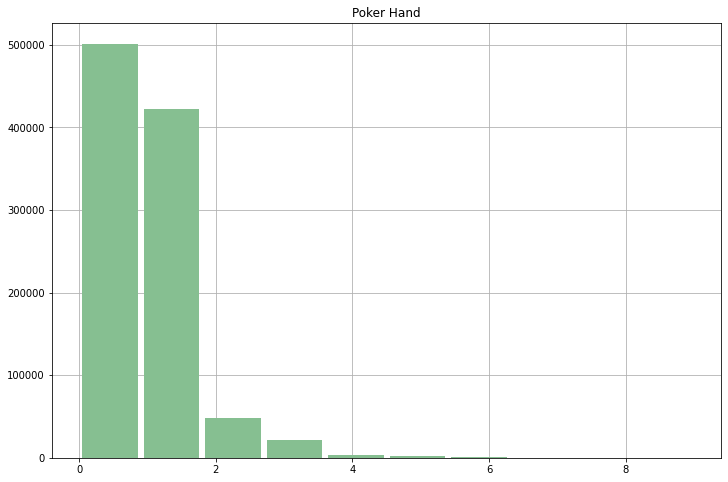

In [23]:
labels = ['Nada na mão','Um par','Dois pares','Trinca','Straight','Flush','Full house','Quadra','Straight flush','Royal flush']
data_test.hist(column='Poker Hand',grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [0]:
y_train=data_train['Poker Hand']
y_test=data_test['Poker Hand']
y_train=pd.get_dummies(y_train)
y_test=pd.get_dummies(y_test)

In [0]:
x_train=data_train.drop('Poker Hand',axis=1)
x_test=data_test.drop('Poker Hand',axis=1)

In [26]:
print('Shape of Training Set:',x_train.shape)
print('Shape of Testing Set:',x_test.shape)

Shape of Training Set: (25010, 10)
Shape of Testing Set: (1000000, 10)


---------------------------------------------------------------------------------------
### REDE NEURAL
---------------------------------------------------------------------------------------

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers

Using TensorFlow backend.


In [28]:
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=10))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 10, batch_size = 256, verbose=1,validation_data=(x_test,y_test),shuffle=True)
score = model.evaluate(x_test, y_test, batch_size=256)

Train on 25010 samples, validate on 1000000 samples
Epoch 1/10
25010/25010 [==============================] - 4s 162us/step - loss: 0.2312 - accuracy: 0.8976 - val_loss: 0.1897 - val_accuracy: 0.8993
Epoch 2/10
25010/25010 [==============================] - 4s 148us/step - loss: 0.1835 - accuracy: 0.8993 - val_loss: 0.1787 - val_accuracy: 0.9012
Epoch 3/10
25010/25010 [==============================] - 4s 148us/step - loss: 0.1775 - accuracy: 0.9013 - val_loss: 0.1756 - val_accuracy: 0.9021
Epoch 4/10
25010/25010 [==============================] - 4s 155us/step - loss: 0.1752 - accuracy: 0.9025 - val_loss: 0.1743 - val_accuracy: 0.9046
Epoch 5/10
25010/25010 [==============================] - 4s 149us/step - loss: 0.1742 - accuracy: 0.9036 - val_loss: 0.1734 - val_accuracy: 0.9052
Epoch 6/10
25010/25010 [==============================] - 4s 145us/step - loss: 0.1737 - accuracy: 0.9039 - val_loss: 0.1729 - val_accuracy: 0.9055
Epoch 7/10
25010/25010 [==============================] - 4s

---------------------------------------------------------------------------------------
##### A precisão da validação está chegando a pelo menos 90,04%.
---------------------------------------------------------------------------------------

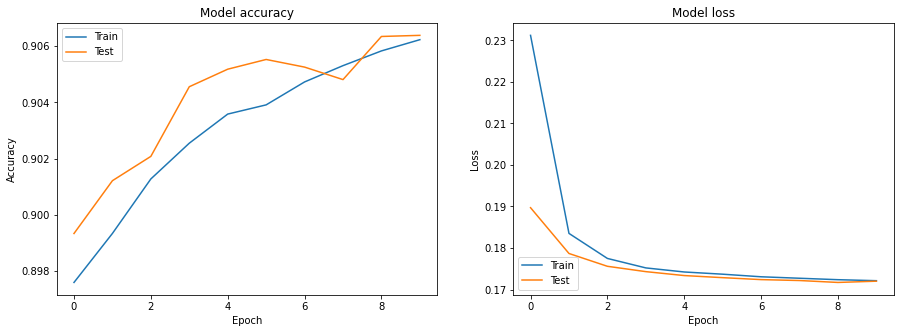

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(data_train['Poker Hand'])
y_test=le.transform(data_test['Poker Hand'])

-----------------------------------------------------------------------
### REGRESSÃO LOGÍSTICA
------------------------------------------------------------

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=100,multi_class='ovr').fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.501209

-----------------------------------------------------------------------
### Árvore de Decisão
------------------------------------------------------------

In [32]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0,max_depth = 2)
decision_tree = decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
accuracy_score(y_pred,y_test)

0.501209

In [0]:
# from sklearn import svm
# clf = svm.LinearSVC()
# clf.fit(x_train,y_train) 
# y_pred = clf.predict(x_test)
# accuracy_score(y_pred,y_test)

In [0]:
# profile = ProfileReport(data_test, title='Poker', explorative=True)
# profile.to_notebook_iframe()